# Handout 6. Regression and correlation

## 1.	Simple linear regression 
The linear regression model is given by

$$y_i = \alpha + \beta x_i + \varepsilon_i,$$

in which the $\varepsilon_i$ are assumed independent and $N(0, \sigma^2)$. The parameters $\alpha$, $\beta$, and $\sigma^2$ can be estimated using the *method of least squares*. In particular, the values of $\alpha$ and $\beta$ can be obtained by minimizing the sum of squared residuals, and $\sigma^2$ can be estimated via the sum of squared residuals. 

It is usually of prime interest to test the null hypothesis $\beta=0$, for which we can use a $t$ test. 

In [1]:
logret<-read.table("http://www.ams.sunysb.edu/~songwu/AMS561/d_logret_6stocks.txt", header=T)
names(logret)

[1] "Date"      "Pfizer"    "Intel"     "Citigroup" "AmerExp"   "Exxon"    
[7] "GenMotor"

In [2]:
attach(logret)
fit1<- lm(Pfizer~Intel)

Call:	lm(formula = Pfizer ~ Intel)

Coefficients:
(Intercept)        Intel
  -0.003903     0.023078

In [3]:
summary(fit1)


Call:
lm(formula = Pfizer ~ Intel)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.055920 -0.013845  0.000851  0.017246  0.045693 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.003903   0.002913  -1.340    0.185
Intel        0.023078   0.043112   0.535    0.594

Residual standard error: 0.02321 on 62 degrees of freedom
Multiple R-squared:  0.0046,	Adjusted R-squared:  -0.01145 
F-statistic: 0.2865 on 1 and 62 DF,  p-value: 0.5944


In [4]:
names(fit1)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [5]:
fit1$coeff

(Intercept)       Intel 
-0.00390318  0.02307791

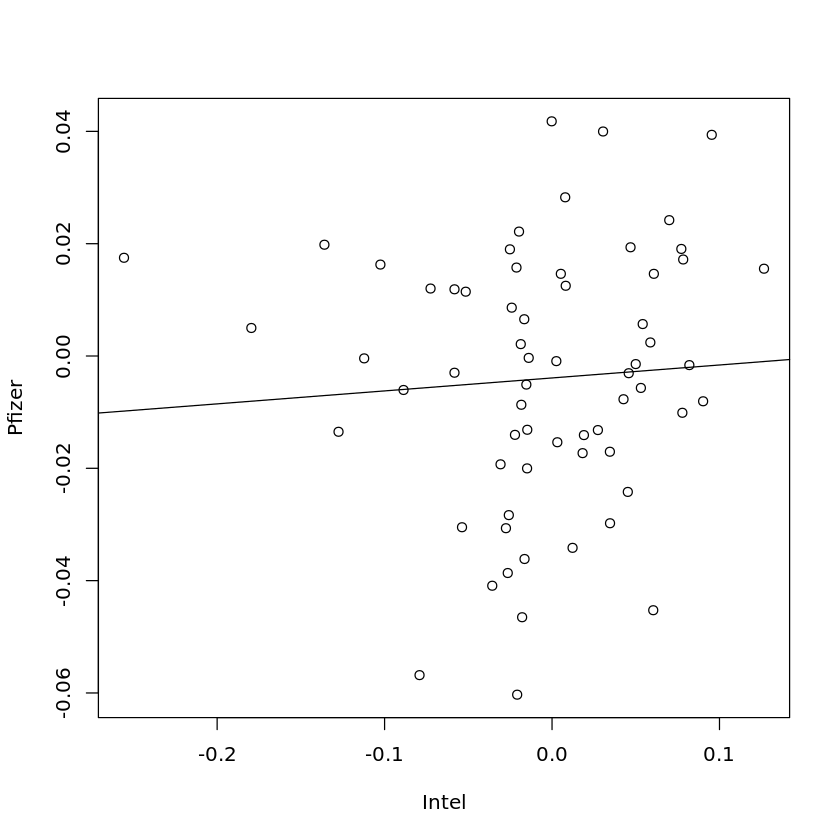

In [6]:
plot(Intel, Pfizer)
abline(lm(Pfizer~Intel))

In [7]:
fit2<-lm(Pfizer~-1+Intel)	### regression without intercept
summary(fit2)


Call:
lm(formula = Pfizer ~ -1 + Intel)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.059716 -0.017863 -0.003199  0.013654  0.041790 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)
Intel  0.02819    0.04321   0.652    0.516

Residual standard error: 0.02336 on 63 degrees of freedom
Multiple R-squared:  0.006712,	Adjusted R-squared:  -0.009054 
F-statistic: 0.4257 on 1 and 63 DF,  p-value: 0.5165


## 2.	Residuals and fitted values
We have seen how summary can be used to extract information about the results of a regression analysis. Two further extraction functions are `fitted` and `resid`.

In [8]:
fitted(fit1)
resid(fit1)

1             2             3             4             5 
-0.0027497170 -0.0098023371 -0.0031059136 -0.0055774973 -0.0062686160 
            6             7             8             9            10 
-0.0018210192 -0.0064923877 -0.0047271105 -0.0022878538 -0.0052477127 
           11            12            13            14            15 
-0.0031038796 -0.0037146614 -0.0045385026 -0.0070402547 -0.0021212967 
           16            17            18            19            20 
-0.0009819628 -0.0042821637 -0.0028213677 -0.0059497454 -0.0032712130 
           21            22            23            24            25 
-0.0045135463 -0.0042470549 -0.0080473355 -0.0036202090 -0.0050925670 
           26            27            28            29            30 
-0.0057292852 -0.0017022410 -0.0020107797 -0.0068456348 -0.0038440493 
           31            32            33            34            35 
-0.0029181916 -0.0044837431 -0.0026787417 -0.0026536331 -0.0039080966 
           36            37            38            39            40 
-0.0021070376 -0.0025084798 -0.0042859774 -0.0020956820 -0.0037217564 
           41            42            43            44            45 
-0.0043582645 -0.0043933007 -0.0043342526 -0.0046129133 -0.0044586338 
           46            47            48            49            50 
-0.0028463996 -0.0042444389 -0.0051438634 -0.0052474851 -0.0044988550 
           51            52            53            54            55 
-0.0028588657 -0.0038303210 -0.0034637745 -0.0043153992 -0.0031999337 
           56            57            58            59            60 
-0.0042246509 -0.0037819547 -0.0024999688 -0.0042572917 -0.0034819521 
           61            62            63            64 
-0.0044139479 -0.0043265083 -0.0043836219 -0.0025482778

1             2             3             4             5 
 0.0013111050  0.0272916111 -0.0139402024  0.0175904313  0.0225473170 
            6             7             8             9            10 
-0.0062420638  0.0060694077 -0.0361791835  0.0264780818  0.0022689257 
           11            12            13            14            15 
-0.0266775094  0.0162190934 -0.0261246974  0.0268557347  0.0211850277 
           16            17            18            19            20 
 0.0165258578 -0.0318636273  0.0221780547 -0.0001004526 -0.0099167620 
           21            22            23            24            25 
-0.0341268797 -0.0157651711  0.0130369555 -0.0305389430  0.0165446340 
           26            27            28            29            30 
-0.0510936318  0.0410847420  0.0003900007 -0.0066475122  0.0029294243 
           31            32            33            34            35 
-0.0047795374  0.0234781331 -0.0030081733  0.0083405481  0.0456925796 
           36            37            38            39            40 
-0.0080028214 -0.0427578312  0.0108328714  0.0192801070  0.0319773724 
           41            42            43            44            45 
 0.0265121525  0.0201413757  0.0064494286 -0.0146753167  0.0130664378 
           46            47            48            49            50 
-0.0002174194 -0.0088913861 -0.0253478596  0.0171237381 -0.0238331950 
           51            52            53            54            55 
-0.0213420733 -0.0115263230 -0.0106209155 -0.0422010728  0.0431754497 
           56            57            58            59            60 
 0.0038865469  0.0184150057  0.0171305578 -0.0008315333 -0.0138138029 
           61            62            63            64 
-0.0096267851 -0.0043561977 -0.0559197441  0.0049599148

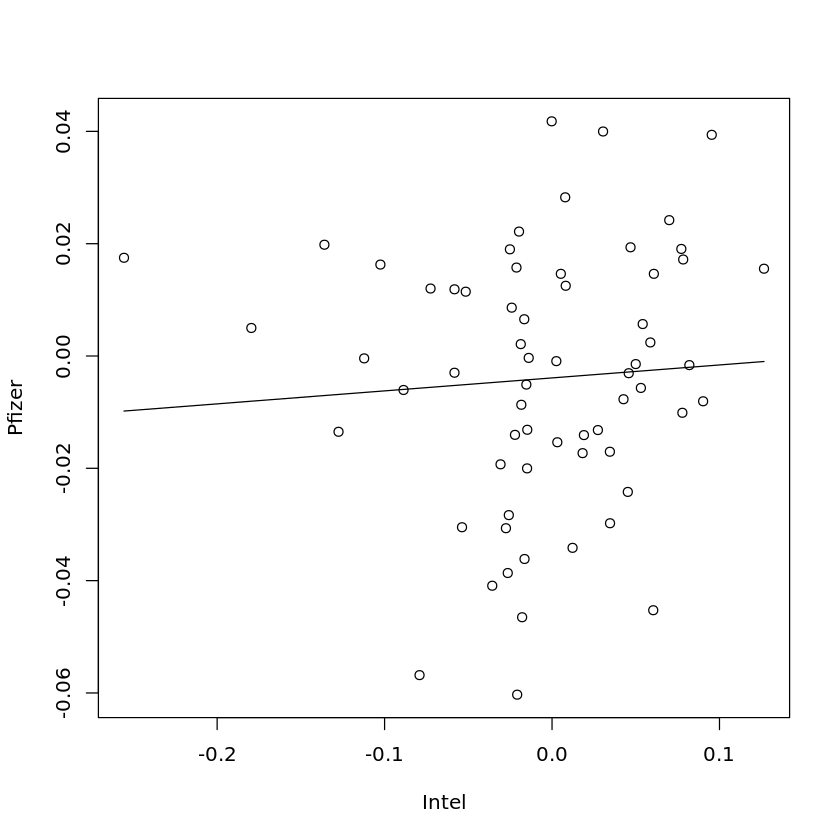

In [9]:
plot(Intel, Pfizer)
lines(Intel, fitted(fit1))

## 3.	Prediction and confidence bands
Fitted lines are often presented with uncertainty bands around them. There are two kinds of bands, often referred to as the *“narrow”* and *“wide”* limits.

The narrow bands, *confidence bands*, reflect the uncertainty about the line itself. The wide bands, *prediction bands*, include the uncertainty about future observations.

Predicted values, with or without prediction and confidence bands, may be extracted with the function predict. With no arguments, it just gives the fitted values:

In [10]:
predict(fit1)

1             2             3             4             5 
-0.0027497170 -0.0098023371 -0.0031059136 -0.0055774973 -0.0062686160 
            6             7             8             9            10 
-0.0018210192 -0.0064923877 -0.0047271105 -0.0022878538 -0.0052477127 
           11            12            13            14            15 
-0.0031038796 -0.0037146614 -0.0045385026 -0.0070402547 -0.0021212967 
           16            17            18            19            20 
-0.0009819628 -0.0042821637 -0.0028213677 -0.0059497454 -0.0032712130 
           21            22            23            24            25 
-0.0045135463 -0.0042470549 -0.0080473355 -0.0036202090 -0.0050925670 
           26            27            28            29            30 
-0.0057292852 -0.0017022410 -0.0020107797 -0.0068456348 -0.0038440493 
           31            32            33            34            35 
-0.0029181916 -0.0044837431 -0.0026787417 -0.0026536331 -0.0039080966 
           36            37            38            39            40 
-0.0021070376 -0.0025084798 -0.0042859774 -0.0020956820 -0.0037217564 
           41            42            43            44            45 
-0.0043582645 -0.0043933007 -0.0043342526 -0.0046129133 -0.0044586338 
           46            47            48            49            50 
-0.0028463996 -0.0042444389 -0.0051438634 -0.0052474851 -0.0044988550 
           51            52            53            54            55 
-0.0028588657 -0.0038303210 -0.0034637745 -0.0043153992 -0.0031999337 
           56            57            58            59            60 
-0.0042246509 -0.0037819547 -0.0024999688 -0.0042572917 -0.0034819521 
           61            62            63            64 
-0.0044139479 -0.0043265083 -0.0043836219 -0.0025482778

If you add interval="confidence" or interval="prediction", then you get the vector of predicted values augmented with limits.

In [11]:
predict(fit1, int="c")
predict(fit1, int="p")

,fit,lwr,upr
1,-0.0027497170,-0.010293379,0.004793945
2,-0.0098023371,-0.032083930,0.012479256
3,-0.0031059136,-0.009876806,0.003664979
4,-0.0055774973,-0.013735418,0.002580423
5,-0.0062686160,-0.016408775,0.003871543
6,-0.0018210192,-0.011939729,0.008297690
7,-0.0064923877,-0.017328516,0.004343740
8,-0.0047271105,-0.011067616,0.001613395
9,-0.0022878538,-0.011035373,0.006459665
10,-0.0052477127,-0.012592028,0.002096602


Warning message in predict.lm(fit1, int = "p"):
“predictions on current data refer to _future_ responses
”

,fit,lwr,upr
1,-0.0027497170,-0.04976129,0.04426186
2,-0.0098023371,-0.06127709,0.04167242
3,-0.0031059136,-0.04999969,0.04378786
4,-0.0055774973,-0.05269154,0.04153654
5,-0.0062686160,-0.05376603,0.04122879
6,-0.0018210192,-0.04931385,0.04567182
7,-0.0064923877,-0.05414323,0.04115846
8,-0.0047271105,-0.05156068,0.04210646
9,-0.0022878538,-0.04950756,0.04493185
10,-0.0052477127,-0.05222771,0.04173228


The best way to add prediction and confidence intervals to a scatterplot is to use the `matlines` function, which plots the columns of a matrix against a vector.

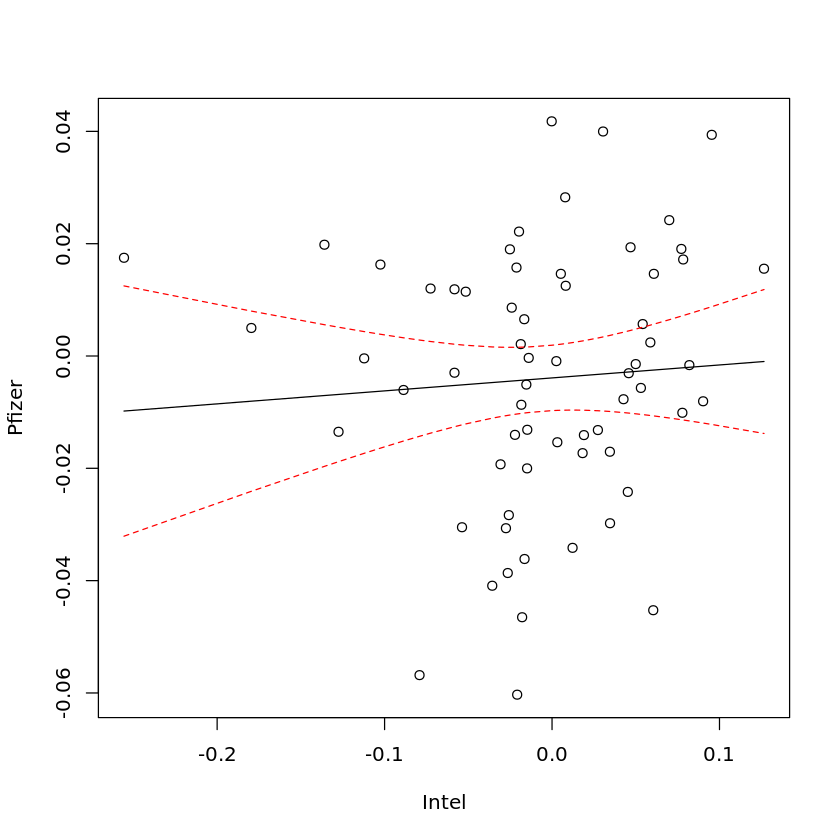

In [12]:
plot(Intel, Pfizer)
pp<-predict(fit1, int="c")
matlines(sort(Intel), pp[order(Intel),], lty=c(1,2,2),    col=c("black", "red", "red"))

**Exercise**:
 - Plot the original data points, fitted values and 95% prediction bands. 


 - Try different line styles and colors.

## 4.	Correlation
The function `cor` can be used to compute the correlation between two or more vectors.

In [13]:
cor(Intel, Pfizer)

[1] 0.06782663

In [14]:
cor.test(Intel, Pfizer)


	Pearson's product-moment correlation

data:  Intel and Pfizer
t = 0.5353, df = 62, p-value = 0.5944
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1810004  0.3084926
sample estimates:
       cor 
0.06782663 
